[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ytdxa3se)

## Introducción

En este notebook, se realizará un estudio comparativo de modelos de regresión para predecir el costo de un seguro médico. El dataset utilizado es el [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) de Kaggle.



**Los pasos a seguir para el desarrollo del notebook son los siguientes:**

1. Comprensión del problema
2. Análisis exploratorio de datos
3. Preprocesamiento de datos
4. Modelado
5. Evaluación de modelos
6. Conclusiones

**Los modelos a comparar son:**

* Regresión lineal
* K-vecinos más cercanos
* Árbol de decisión
* Máquina de vectores de soporte
* Random Forest
* Ensamble de modelos

## 1. Comprensión del problema

La primera fase del proyecto implica una comprensión detallada del problema en cuestión. En este caso, el objetivo es predecir el costo de un seguro médico. Se dispone de un conjunto de datos que contiene información sobre 1338 personas, caracterizadas por factores como edad, sexo, índice de masa corporal (BMI), número de hijos, hábito de fumar, región de residencia en los Estados Unidos y el costo de su seguro médico.

Características del Dataset:

1. **Edad**: Variable que representa la edad de cada individuo.
2. **Sexo**: Indicador del género del individuo (masculino o femenino).
3. **Índice de Masa Corporal (BMI)**: Medida que evalúa la proporción de peso y altura.
4. **Número de Hijos**: Cantidad de hijos o dependientes cubiertos por el seguro.
5. **Hábito de Fumar**: Indica si el individuo es fumador o no.
6. **Región de Residencia**: Ubicación geográfica en los Estados Unidos (noreste, sureste, suroeste, noroeste).
7. **Costo de Seguro Médico**: Variable dependiente que se busca predecir.


Dado que la variable objetivo es continua (el costo del seguro médico), este problema se clasifica como un problema de regresión. La comprensión detallada de estas variables es esencial para seleccionar y diseñar modelos de regresión efectivos en las fases subsiguientes del proyecto.



## 2. Análisis exploratorio de datos

En esta fase, se procede a realizar un análisis exploratorio de los datos para obtener una visión más profunda de la información disponible. Este paso es crucial para identificar patrones, tendencias y características que puedan influir en la predicción del costo del seguro médico.

### Pasos Clave:

* **Carga de Datos**

Se cargarán los datos en un DataFrame de Pandas para su posterior análisis. Se utilizará la función `head()` para visualizar las primeras filas del conjunto de datos.

* **Información del Dataset**

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

* **Estadísticas Descriptivas**

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

* **Visualización de Datos**

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.

* **Correlación entre Variables**
  
Se analizará la correlación entre las variables para comprender las relaciones lineales potenciales. Esto es crucial para seleccionar las características más relevantes en fases posteriores.

* **Exploración de Variables Categóricas**
  
Para las variables categóricas, como el género y la región de residencia, se evaluarán las distribuciones de frecuencia y su impacto en el costo del seguro.

**Resultados Esperados:**

- **Identificación de Tendencias:** Descubrimiento de patrones o tendencias notables en los datos.
- **Detección de Outliers:** Identificación de posibles valores atípicos que puedan afectar la precisión del modelo.
- **Entendimiento de Correlaciones:** Comprensión de las relaciones entre las variables y su relevancia para la predicción.
- **Selección de Características:** Identificación de las variables más influyentes en la predicción del costo del seguro médico.

Este análisis exploratorio establecerá una base sólida para la siguiente fase, donde se realizará la preparación de los datos antes de la construcción y evaluación de modelos de regresión.

### 2.1 Carga de Datos

En esta sección, se cargarán los datos en un DataFrame de Pandas para su posterior análisis. Se utilizará la función `head()` para visualizar las primeras filas del conjunto de datos.

In [1]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.path.dirname(os.getcwd()))

In [2]:
# Importamos la biblioteca pandas
import pandas as pd

# definimos la ruta del dataset a cargar
ruta_dataset = os.path.join(dir_root, 'datasets', 'regression', 'insurance_cost.csv')

# Cargamos el dataset
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploración del DataFrame

Una vez que hemos cargado nuestros datos en un DataFrame de Pandas, hay varias funciones útiles que podemos utilizar para explorar nuestros datos.




### 2.2 Información del Dataset

En esta sección, se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

In [4]:
# Mostrar información sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Adicionalmente, es posible obtener información sobre el número de valores null en cada columna utilizando la función `isnull()`.

In [6]:
# Verificar si hay valores faltantes
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Conclusión:**

- El conjunto de datos contiene 1338 filas y 7 columnas.
- No hay valores nulos en el conjunto de datos.
- Las variables `edad`, `bmi` y `hijos` son de tipo numérico.
- Las variables `sexo`, `fumador` y `region` son de tipo categórico.
- La variable `costo` es la variable objetivo que se busca predecir.
- La variable `costo` es de tipo numérico.

### 2.1. Estadísticas Descriptivas

En esta sección, se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos. 

**Las características categoricas** no se incluyen en el análisis estadístico. Para las variables categóricas, se utilizarán gráficos y visualizaciones en la siguiente sección.
  

In [5]:
# Mostrar estadísticas descriptivas
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Conclusión:**

- La edad promedio de los individuos es de 39 años, con una desviación estándar de 14 años.
- El índice de masa corporal (BMI) promedio es de 30, con una desviación estándar de 6.
- El número promedio de hijos es de 1, con una desviación estándar de 1.
- El costo promedio del seguro médico es de 13270, con una desviación estándar de 12110.
- El rango de valores minimo y máximo para cada variable es el siguiente:
  - Edad: 18 - 64
  - BMI: 16 - 53
  - Hijos: 0 - 5
  - Costo: 1121 - 63770
  
  Los valores de las variables están en diferentes escalas. Esto puede afectar la precisión de los modelos de regresión, por lo que es necesario realizar un preprocesamiento de datos antes de la construcción de modelos.


### 2.3 Visualización de Datos

En esta sección, se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.

- **Histogramas:** Se utilizarán histogramas para visualizar la distribución de las variables numéricas. Esto ayudará a identificar posibles outliers y evaluar la simetría de los datos.
- **Diagramas de Dispersión:** Se utilizarán diagramas de dispersión para visualizar la relación entre dos variables numéricas. Esto ayudará a identificar posibles correlaciones lineales.
- **Boxplots:** Se utilizarán boxplots para visualizar la distribución de las variables categóricas. Esto ayudará a identificar posibles outliers y evaluar la simetría de los datos.
- **Gráficos de Barras:** Se utilizarán gráficos de barras para visualizar la relación entre una variable categórica y una variable numérica. Esto ayudará a identificar posibles correlaciones entre variables categóricas y numéricas.

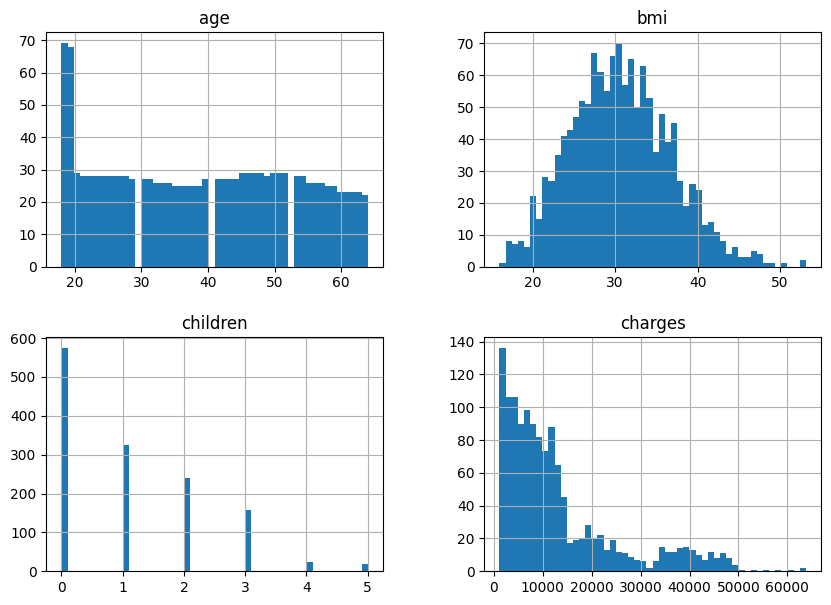

In [4]:
# Importamos las librearías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma del dataset
data.hist(bins=50, figsize=(10,7))
plt.show()

**Conclusiones Histogramas:**

- **age**: La distribución bimodal con picos alrededor de los 20 y 50 años sugiere que hay dos grupos de edad prominentes en el dataset. Esto podría indicar una mayor cantidad de jóvenes adultos y personas de mediana edad en el conjunto de datos.
- **bmi**: La distribución unimodal con un pico alrededor de 30 indica que la mayoría de las personas en el dataset tienen un IMC cercano a 30, lo cual se considera en el límite entre sobrepeso y obesidad según los estándares de la Organización Mundial de la Salud.
- **children**: La distribución unimodal con un pico en 0 sugiere que la mayoría de las personas en el dataset no tienen hijos. Esto podría ser relevante para el análisis de costos médicos, ya que tener hijos puede influir en los gastos de salud.
- **charges**: La distribución sesgada a la derecha con un pico alrededor de 10,000 indica que la mayoría de las personas tienen cargos médicos bajos, pero hay una cola larga de personas con cargos muy altos. Esto podría reflejar la variabilidad en los costos médicos y la presencia de casos extremos con gastos muy elevados.


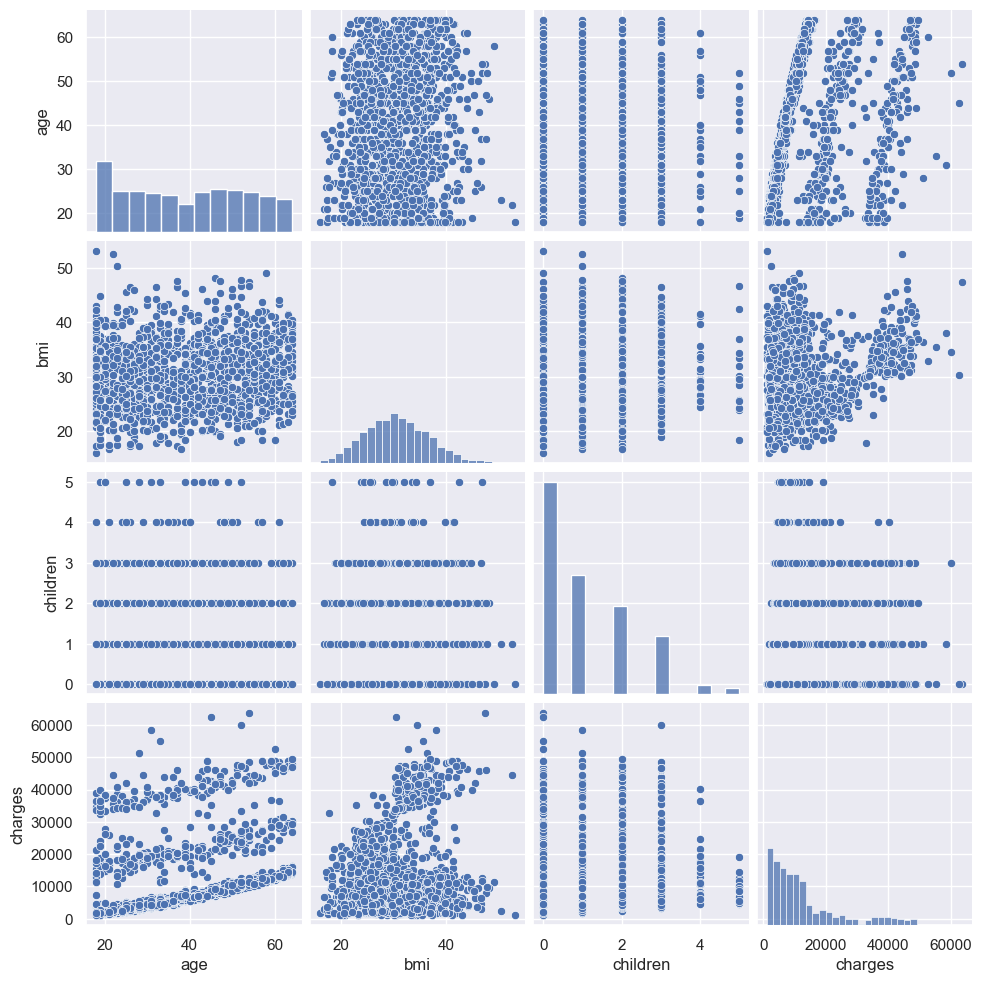

In [18]:
# Gráfico de dispersión de las variables numéricas
sns.pairplot(data, kind='scatter')
plt.show();

Para entender un diagrama de dispersión, considera lo siguiente:

* **Ejes**: Cada eje representa una variable diferente. Por ejemplo, el eje horizontal (x) podría ser la edad y el eje vertical (y) podría ser el costo médico.
* **Puntos**: Cada punto en el gráfico corresponde a un registro en el dataset y muestra los valores de ambas variables para ese registro.
* **Patrones**: La forma en que se distribuyen los puntos puede indicar el tipo de relación entre las variables. Por ejemplo, si los puntos se agrupan en una línea ascendente, esto sugiere una correlación positiva; es decir, a medida que una variable aumenta, la otra también tiende a aumentar.
* **Correlación**: Si los puntos forman una línea recta ascendente o descendente, esto indica una correlación fuerte y lineal. Si los puntos están dispersos sin un patrón claro, la correlación podría ser débil o inexistente.

* **Tipos de correlación**:

  - **Positiva**: Si una variable aumenta y la otra también, la correlación es positiva.
  - **Negativa**: Si una variable aumenta y la otra disminuye, la correlación es negativa.
  - **Nula**: Si no hay un patrón claro y los puntos están dispersos aleatoriamente, puede que no haya correlación.

**Conclusiones Diagramas de Dispersión:**

- El diagrama de dispersión no muestra una correlación clara entre ninguna de las variables numéricas. Esto sugiere que las variables numéricas no están fuertemente relacionadas entre sí. Además, esto indica que la variable objetivo (`charges`) no está fuertemente correlacionada con ninguna de las variables numéricas.

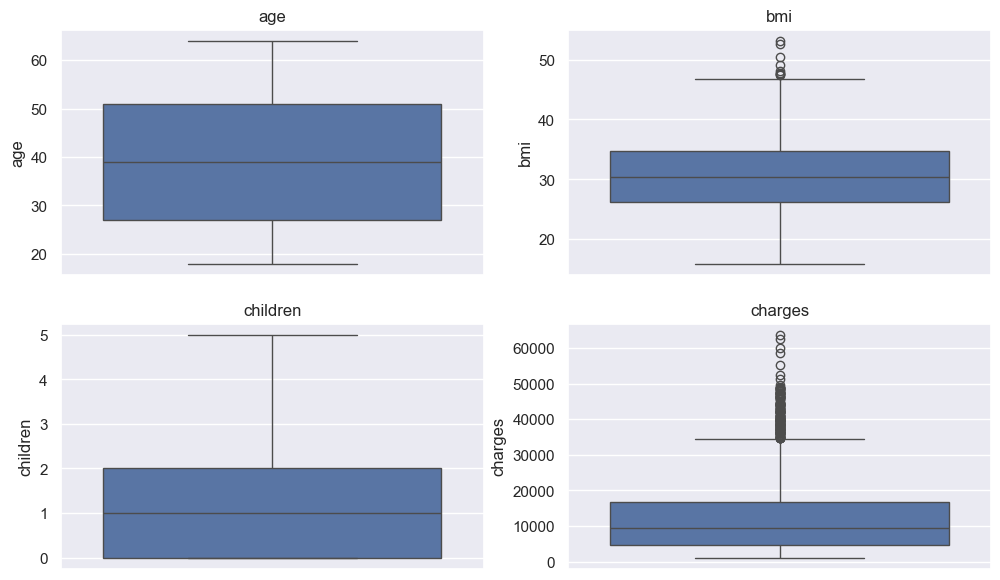

In [15]:
# boxplot de las variables numéricas en graficas independientes
plt.figure(figsize=(12,7))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data[col])
    plt.title(col)

Un diagrama boxplot, también conocido como diagrama de caja, es una representación gráfica que muestra la distribución de un conjunto de datos numéricos a través de sus cuartiles. Aquí te explico cómo interpretar un boxplot:

- **Línea central (Mediana)**: La línea que divide la caja en dos partes representa la mediana o segundo cuartil de los datos. Esto indica el valor medio del conjunto de datos, donde la mitad de los datos son menores y la otra mitad son mayores.
- **Caja (Intervalo Interquartílico)**: La caja del boxplot representa el intervalo interquartílico (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Esto muestra dónde se concentra la mitad central de los datos.
- **Bigotes (Valores Máximo y Mínimo)**: Los bigotes del boxplot se extienden desde la caja hasta los valores máximo y mínimo dentro de un límite determinado, que suele ser 1.5 veces el IQR por encima y por debajo de los cuartiles. Los datos fuera de estos límites se consideran valores atípicos.
- **Valores Atípicos (Outliers)**: Los puntos que se encuentran fuera de los bigotes se consideran valores atípicos o extremos. Estos pueden indicar variabilidad en los datos o posibles errores de medición.
- **Simetría y Sesgo**: La posición de la mediana dentro de la caja puede indicar si los datos están sesgados. Si la mediana está cerca del primer cuartil, los datos pueden estar sesgados hacia la derecha; si está cerca del tercer cuartil, pueden estar sesgados hacia la izquierda.

**Conclusiones Boxplots:**

- **age**: Un rango de 18 a 64 con la mediana alrededor de 40 indica que la mayoría de las personas tienen entre 20 y 50 años.
- **bmi**: Un rango de 10 a 53 con la mediana alrededor de 30 indica que la mayoría de las personas tienen un IMC entre 20 y 40, lo cual se considera en el límite entre sobrepeso y obesidad según los estándares de la Organización Mundial de la Salud.
- **children**: Un rango de 0 a 5 con la mediana alrededor de 1 indica que la mayoría de las personas no tienen hijos, pero hay un número significativo de personas con 1, 2 o 3 hijos. 
- **charges**: Un rango de 0 a 600000 con la mediana alrededor de 100000 muestra una gran variabilidad en los cargos médicos, con algunos valores extremadamente altos representados por los outliers.

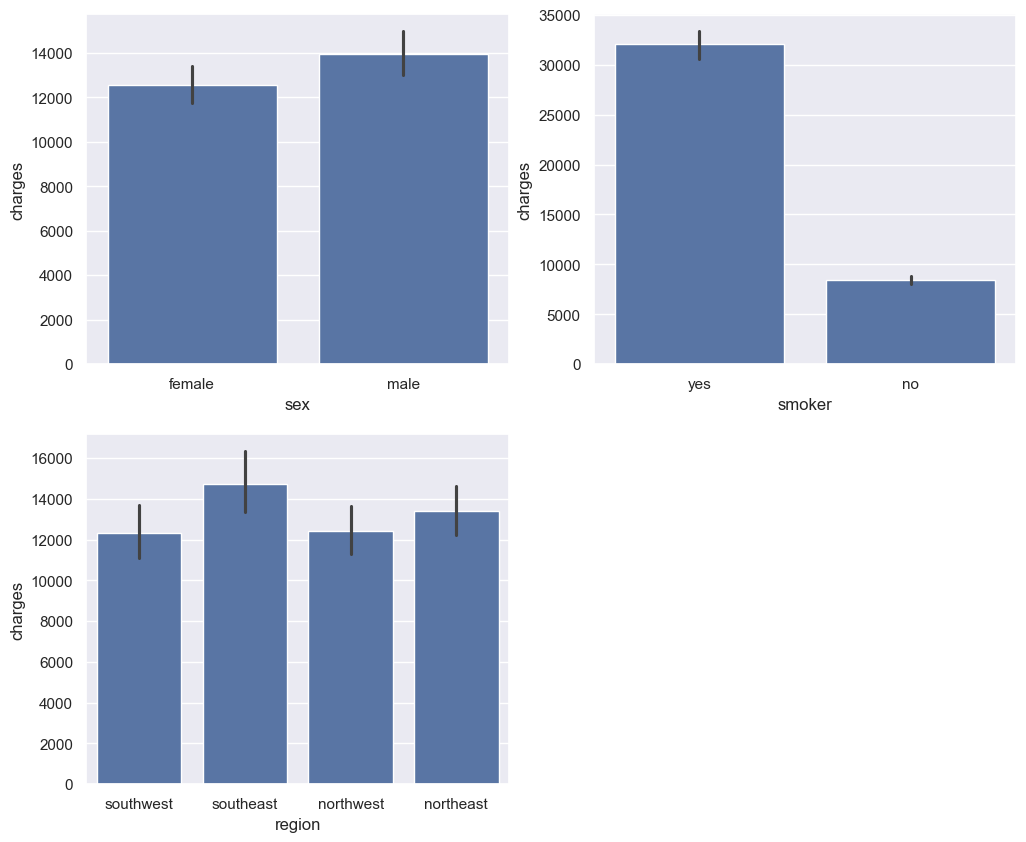

In [29]:
# grafico de barras de la variables categoricas vs la variable objetivo (costo)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(data.select_dtypes(include=['object']).columns):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=col, y='charges', data=data)
    plt.xticks(rotation=0)
plt.subplots_adjust(hspace=0.2)
plt.subplot(2, 2, 4).axis('off')
plt.show()

**Conclusión:**

- La variable `edad` tiene una distribución aproximadamente simétrica, con una ligera asimetría positiva.
- 